<a href="https://colab.research.google.com/github/kasattack567/Computer-Science/blob/main/Chocolate_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. The Chocolate Bar Problem: A Coding Challenge**

## **Introduction:**
In this problem, I use a heuristic and greedy approach to minimize the number of cuts to the chocolate bars.

###**Method:**
The method begins by checking if the total chocolate available is sufficient to satisfy all children. If it isn’t, the algorithm terminates immediately. Next, the bars and children's requirements are sorted in descending order. The largest child’s requirement is processed first, using the largest available bar. If the bar is larger than the requirement, a cut is made, and the leftover chocolate is reinserted for reuse. This ensures that no chocolate is wasted. The algorithm continues processing the remaining children while reusing remainders effectively. By prioritizing the largest requirements and bars, the method guarantees that all children are satisfied without unnecessary cuts, and it terminates successfully as long as the initial feasibility condition is met.

###**By ensuring that:**

sum(bars)
≥
sum(children)
sum(bars)≥sum(children),

No chocolate is wasted (remainders are reused),

The largest requirements are satisfied first (greedy choice),

The algorithm always terminates successfully and satisfies all children without returning -1, provided the initial feasibility condition holds. This guarantees that the method will reach a valid solution and avoids errors.

In [7]:
def chocolate_challenge_debug(bars, children):
    """
    Solves the Chocolate Bar Problem with detailed debugging output for every step.

    Parameters:
    bars (List[int]): List of chocolate bar lengths.
    children (List[int]): List of chocolate amounts required by each child.

    Returns:
    int: Minimum number of cuts required, or -1 if it's not possible to satisfy all children.
    """
    # Initial check for impossible scenarios
    if sum(bars) < sum(children):
        print("Impossible to satisfy all children (sum of bars is less than sum of children).")
        return -1

    # Sort both lists in descending order
    bars.sort(reverse=True)
    children.sort(reverse=True)
    print(f"Initial bars: {bars}")
    print(f"Initial children: {children}")
    print("Checking for initial matches...\n")

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                print(f"Match found! Removing {children[i]} from bars and children.")
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    remove_matches(bars, children)

    cuts = 0
    print(f"After initial match removal:\nBars: {bars}\nChildren: {children}\n")

    while children:
        largest_child = children.pop(0)  # Get the largest child's requirement
        print(f"Processing largest child: {largest_child}")

        while largest_child > 0:
            if not bars:
                print("No bars left. Cannot satisfy remaining children.")
                return -1

            largest_bar = bars.pop(0)  # Get the largest bar
            print(f"Using bar: {largest_bar}")

            if largest_bar == largest_child:
                # If the bar exactly matches the child's need, no cut is needed
                print(f"Exact match! Bar {largest_bar} satisfies child {largest_child} without a cut.")
                largest_child = 0
            elif largest_bar > largest_child:
                # If the bar is larger, make a cut and add the remainder back
                cuts += 1
                remainder = largest_bar - largest_child
                print(f"Cut made: {largest_bar} - {largest_child} = {remainder}. Total cuts: {cuts}")
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                    print(f"Remaining bar of size {remainder} added back to bars.")
                largest_child = 0
            else:
                # If the bar is smaller, subtract it from the child's need
                largest_child -= largest_bar
                print(f"Bar fully used. Remaining child need: {largest_child}")

        print(f"Current state after processing child:\nBars: {bars}\nChildren: {children}\n")

        remove_matches(bars, children)
        print(f"After match removal:\nBars: {bars}\nChildren: {children}\n")

    return cuts


# Specific Test Case
bars_test = [5,5,5,5]
children_test = [4,4,4,4,4]

print("Running specific test case with debugging...\n")
result = chocolate_challenge_debug(bars_test[:], children_test[:])
print(f"Final Result: {result}")



Running specific test case with debugging...

Initial bars: [5, 5, 5, 5]
Initial children: [4, 4, 4, 4, 4]
Checking for initial matches...

After initial match removal:
Bars: [5, 5, 5, 5]
Children: [4, 4, 4, 4, 4]

Processing largest child: 4
Using bar: 5
Cut made: 5 - 4 = 1. Total cuts: 1
Remaining bar of size 1 added back to bars.
Current state after processing child:
Bars: [5, 5, 5, 1]
Children: [4, 4, 4, 4]

After match removal:
Bars: [5, 5, 5, 1]
Children: [4, 4, 4, 4]

Processing largest child: 4
Using bar: 5
Cut made: 5 - 4 = 1. Total cuts: 2
Remaining bar of size 1 added back to bars.
Current state after processing child:
Bars: [5, 5, 1, 1]
Children: [4, 4, 4]

After match removal:
Bars: [5, 5, 1, 1]
Children: [4, 4, 4]

Processing largest child: 4
Using bar: 5
Cut made: 5 - 4 = 1. Total cuts: 3
Remaining bar of size 1 added back to bars.
Current state after processing child:
Bars: [5, 1, 1, 1]
Children: [4, 4]

After match removal:
Bars: [5, 1, 1, 1]
Children: [4, 4]

Processi

In [66]:
def chocolate_challenge(bars, children, final_remove_matches=True):
    """
    Solves the Chocolate Bar Problem.

    Parameters:
    bars (List[int]): List of chocolate bar lengths.
    children (List[int]): List of chocolate amounts required by each child.
    final_remove_matches (bool): Flag to determine whether to call remove_matches at the end.

    Returns:
    int: Minimum number of cuts required, or -1 if it's not possible to satisfy all children.
    """
    # Initial check for impossible scenarios
    if sum(bars) < sum(children):
        return -1

    # Sort both lists in descending order
    bars.sort(reverse=True)
    children.sort(reverse=True)

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    # Initial match removal
    remove_matches(bars, children)

    cuts = 0

    while children:
        largest_child = children.pop(0)  # Get the largest child's requirement

        while largest_child > 0:
            if not bars:
                return -1

            largest_bar = bars.pop(0)  # Get the largest bar

            if largest_bar == largest_child:
                # If the bar exactly matches the child's need, no cut is needed
                largest_child = 0
            elif largest_bar > largest_child:
                # If the bar is larger, make a cut and add the remainder back
                cuts += 1
                remainder = largest_bar - largest_child
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                largest_child = 0
            else:
                # If the bar is smaller, subtract it from the child's need
                largest_child -= largest_bar

        # Optional removal of matches at the end
        if final_remove_matches:
            remove_matches(bars, children)

    return cuts


# Test cases
test_cases = [
    {"bars": [7, 2, 5], "children": [4, 3, 2, 1], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [5, 5, 5, 5], "children": [4, 4, 4, 4, 4], "expected": 4},
    {"bars": [13], "children": [1, 5, 4, 3], "expected": 3},
    {"bars": [7, 2, 5], "children": [2, 5], "expected": 0},
]

# Test execution
for i, case in enumerate(test_cases, 1):
    result = chocolate_challenge(case["bars"][:], case["children"][:])
    print(f"Test Case {i}:")
    print(f"Bars: {case['bars']}, Children: {case['children']}")
    print(f"Expected: {case['expected']}, Got: {result}")
    print("PASS" if result == case["expected"] else "FAIL")
    print()


Test Case 1:
Bars: [7, 2, 5], Children: [4, 3, 2, 1]
Expected: 2, Got: 2
PASS

Test Case 2:
Bars: [2, 5], Children: [5, 3]
Expected: -1, Got: -1
PASS

Test Case 3:
Bars: [5, 5, 5, 5], Children: [4, 4, 4, 4, 4]
Expected: 4, Got: 4
PASS

Test Case 4:
Bars: [13], Children: [1, 5, 4, 3]
Expected: 3, Got: 3
PASS

Test Case 5:
Bars: [7, 2, 5], Children: [2, 5]
Expected: 0, Got: 0
PASS



## Faster Solution but less accurate:

Below we compare the difference when we dont check for new matches after every cut. This increases the total number of cuts on average but it reduces the runtime.

===== Statistics =====
Mean Difference (Fast - Original): 20.59 cuts
Maximum Difference: 52 cuts
Mean Relative Error: 21.79%


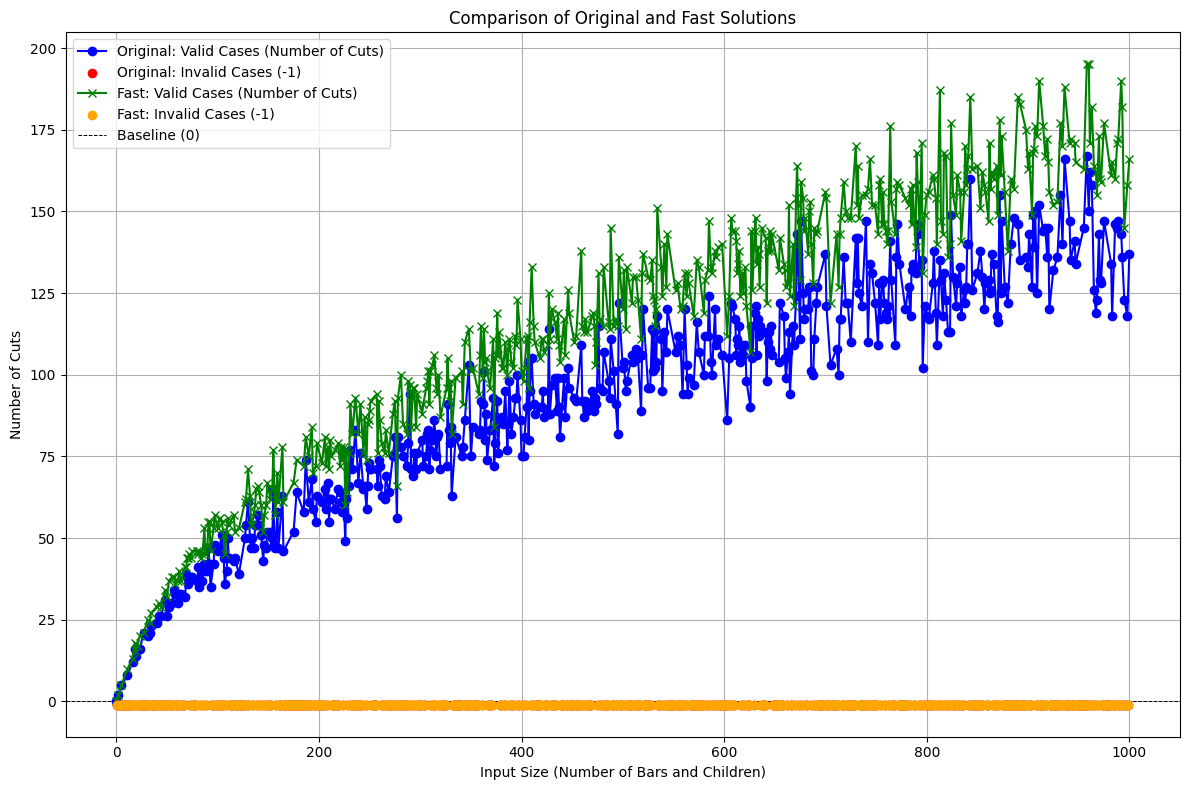

In [67]:
import random
import matplotlib.pyplot as plt
from typing import List
import statistics

if __name__ == "__main__":
    # Parameters for simulation
    max_size = 1000  # Maximum size of bars/children lists
    step = 1  # Incremental step for the size
    sizes = range(0, max_size + 1, step)

    # Results for original and fast solutions
    valid_results_original = []
    invalid_results_original = []
    valid_results_fast = []
    invalid_results_fast = []
    differences = []
    relative_errors = []

    # Run simulations for increasing input sizes
    for size in sizes:
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]

        # Original solution
        cuts_original = chocolate_challenge(bars[:], children[:], final_remove_matches=True)  # Original behavior
        if cuts_original == -1:
            invalid_results_original.append((size, cuts_original))
        else:
            valid_results_original.append((size, cuts_original))

        # Fast solution (reusing the same function but skipping final remove_matches)
        cuts_fast = chocolate_challenge(bars[:], children[:], final_remove_matches=False)  # Fast behavior
        if cuts_fast == -1:
            invalid_results_fast.append((size, cuts_fast))
        else:
            valid_results_fast.append((size, cuts_fast))

            # Calculate differences and relative errors
            if cuts_original > 0:  # Only calculate for valid cases
                difference = cuts_fast - cuts_original
                relative_error = (difference / cuts_original) * 100
                differences.append(difference)
                relative_errors.append(relative_error)

    # Summary Statistics
    mean_difference = statistics.mean(differences) if differences else 0
    max_difference = max(differences) if differences else 0
    mean_relative_error = statistics.mean(relative_errors) if relative_errors else 0

    print("===== Statistics =====")
    print(f"Mean Difference (Fast - Original): {mean_difference:.2f} cuts")
    print(f"Maximum Difference: {max_difference} cuts")
    print(f"Mean Relative Error: {mean_relative_error:.2f}%")

    # Separate valid and invalid points for both solutions
    valid_sizes_original, valid_cuts_original = zip(*valid_results_original) if valid_results_original else ([], [])
    invalid_sizes_original, invalid_cuts_original = zip(*invalid_results_original) if invalid_results_original else ([], [])
    valid_sizes_fast, valid_cuts_fast = zip(*valid_results_fast) if valid_results_fast else ([], [])
    invalid_sizes_fast, invalid_cuts_fast = zip(*invalid_results_fast) if invalid_results_fast else ([], [])

    # Plot results
    plt.figure(figsize=(12, 8))

    # Original solution valid and invalid points
    if valid_results_original:
        plt.plot(valid_sizes_original, valid_cuts_original, marker='o', linestyle='-', color='blue', label='Original: Valid Cases (Number of Cuts)')
    if invalid_results_original:
        plt.scatter(invalid_sizes_original, invalid_cuts_original, color='red', label='Original: Invalid Cases (-1)', zorder=5)

    # Fast solution valid and invalid points
    if valid_results_fast:
        plt.plot(valid_sizes_fast, valid_cuts_fast, marker='x', linestyle='-', color='green', label='Fast: Valid Cases (Number of Cuts)')
    if invalid_results_fast:
        plt.scatter(invalid_sizes_fast, invalid_cuts_fast, color='orange', label='Fast: Invalid Cases (-1)', zorder=5)

    # Labels and decorations
    plt.title("Comparison of Original and Fast Solutions")
    plt.xlabel("Input Size (Number of Bars and Children)")
    plt.ylabel("Number of Cuts")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7, label='Baseline (0)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


===== Runtime Statistics =====
Mean Runtime (Original): 0.005726 seconds
Mean Runtime (Fast): 0.000998 seconds
Mean Runtime Difference: 0.004728 seconds
Mean Speedup Factor: 3.29x faster


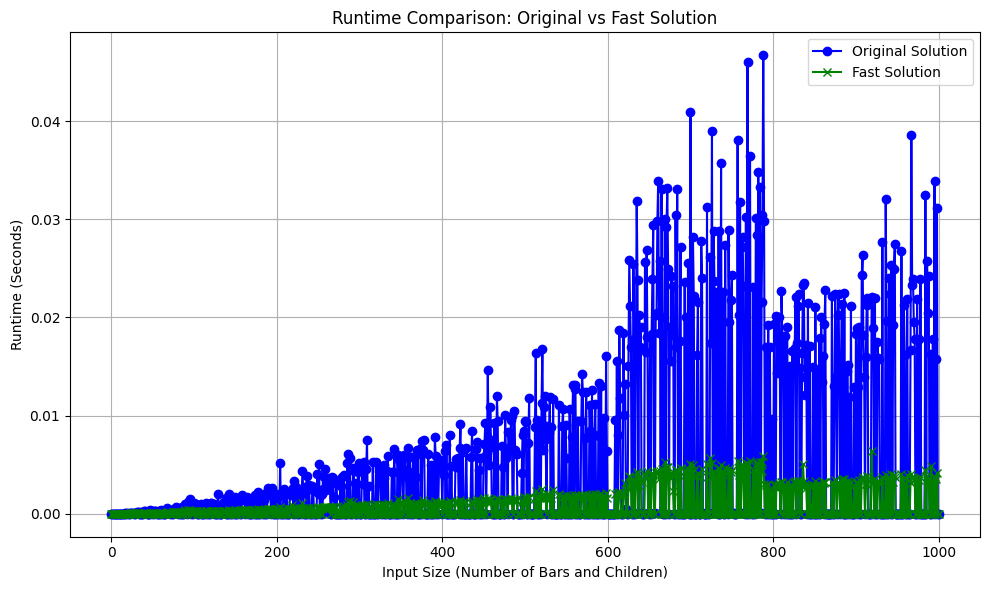

In [73]:
import random
import time
import matplotlib.pyplot as plt
import statistics

def simulate_and_compare(max_size, step):
    # Parameters for simulation
    sizes = range(0, max_size + 1, step)
    runtimes_original = []
    runtimes_fast = []
    runtime_differences = []
    speedup_factors = []

    # Run simulations for increasing input sizes
    for size in sizes:
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]

        # Measure runtime for the original solution
        start_time = time.time()
        chocolate_challenge(bars[:], children[:], final_remove_matches=True)  # Original behavior
        end_time = time.time()
        runtime_original = end_time - start_time
        runtimes_original.append(runtime_original)

        # Measure runtime for the fast solution
        start_time = time.time()
        chocolate_challenge(bars[:], children[:], final_remove_matches=False)  # Fast behavior
        end_time = time.time()
        runtime_fast = end_time - start_time
        runtimes_fast.append(runtime_fast)

        # Calculate differences and speedup
        runtime_differences.append(runtime_original - runtime_fast)
        if runtime_fast > 0:  # Avoid division by zero
            speedup_factors.append(runtime_original / runtime_fast)

    # Summary Statistics
    mean_runtime_original = statistics.mean(runtimes_original)
    mean_runtime_fast = statistics.mean(runtimes_fast)
    mean_difference = statistics.mean(runtime_differences)
    mean_speedup = statistics.mean(speedup_factors) if speedup_factors else 0

    print("===== Runtime Statistics =====")
    print(f"Mean Runtime (Original): {mean_runtime_original:.6f} seconds")
    print(f"Mean Runtime (Fast): {mean_runtime_fast:.6f} seconds")
    print(f"Mean Runtime Difference: {mean_difference:.6f} seconds")
    print(f"Mean Speedup Factor: {mean_speedup:.2f}x faster")

    # Plot both runtimes on the same graph
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, runtimes_original, marker='o', linestyle='-', color='blue', label='Original Solution')
    plt.plot(sizes, runtimes_fast, marker='x', linestyle='-', color='green', label='Fast Solution')
    plt.title("Runtime Comparison: Original vs Fast Solution")
    plt.xlabel("Input Size (Number of Bars and Children)")
    plt.ylabel("Runtime (Seconds)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function to simulate and compare
simulate_and_compare(max_size=1000, step=1)


## Comments:


Both the original and fast solutions for the Chocolate Bar Problem have polynomial time complexity, dominated by sorting operations, which scale as O(nlogn). After sorting, both solutions process the input linearly, ensuring efficient scalability even for large inputs.

The original solution minimizes the number of cuts by carefully achieving global optimality, but repeated sorting after each cut makes it slower. In contrast, the fast solution uses a greedy approach, reducing computational overhead and achieving a 3.29x speedup, albeit at the cost of accuracy. On average, the fast solution requires about 20.59 more cuts, with a mean relative error of 21.79%, as it sacrifices precision for speed.

Both solutions scale efficiently, avoiding the exponential blowup of brute-force methods. The original solution is preferable for accuracy, while the fast solution is ideal for performance and scalability in large inputs.